# Examples

The following examples show how to use the loader APIs:

## 1. Parsing

This sample shows how to read a CWL document from a remote public URL:

In [4]:
import cwl_loader

cwl_document = cwl_loader.load_cwl_from_location('https://github.com/eoap/zarr-cloud-native-format/releases/download/0.3.0/app-water-bodies.0.3.0.cwl')

2025-09-16 23:26:10.140 | DEBUG    | cwl_loader:load_cwl_from_location:228 - Loading CWL document from https://github.com/eoap/zarr-cloud-native-format/releases/download/0.3.0/app-water-bodies.0.3.0.cwl...
2025-09-16 23:26:10.832 | DEBUG    | cwl_loader:_load_cwl_from_stream:231 - Reading stream from https://github.com/eoap/zarr-cloud-native-format/releases/download/0.3.0/app-water-bodies.0.3.0.cwl...
2025-09-16 23:26:10.855 | DEBUG    | cwl_loader:load_cwl_from_stream:205 - CWL data of type <class 'ruamel.yaml.comments.CommentedMap'> successfully loaded from stream
2025-09-16 23:26:10.856 | DEBUG    | cwl_loader:load_cwl_from_yaml:149 - Updating the model of type 'CommentedMap' to version 'v1.2'...
2025-09-16 23:26:10.856 | DEBUG    | cwl_loader:load_cwl_from_yaml:160 - Raw CWL document successfully updated to v1.2! Now converting to the CWL model...
2025-09-16 23:26:23.907 | DEBUG    | cwl_loader:load_cwl_from_yaml:168 - Raw CWL document successfully updated to v1.2! Now dereferencin

## 1.1 Check the parsed document

In [5]:
import sys

cwl_loader.dump_cwl(cwl_document, sys.stderr)

cwlVersion: v1.2
$graph:
- id: water-bodies
  class: Workflow
  label: Water bodies detection based on NDWI and otsu threshold
  doc: Water bodies detection based on NDWI and otsu threshold applied to 
    Sentinel-2 COG STAC items
  inputs:
  - id: stac_api_endpoint
    label: STAC API endpoint
    doc: STAC API endpoint
    type: |-
      https://raw.githubusercontent.com/eoap/schemas/main/experimental/api-endpoint.yaml#APIEndpoint
  - id: search_request
    label: STAC search request
    doc: STAC search request
    type: |-
      https://raw.githubusercontent.com/eoap/schemas/main/experimental/discovery.yaml#STACSearchSettings
  - id: bands
    label: bands used for the NDWI
    doc: bands used for the NDWI
    default:
    - green
    - nir
    type:
      name: _:5d27d0a9-275e-4e36-8a25-69bc087e8ae0
      items: string
      type: array
  outputs:
  - id: zarr_stac_catalog
    outputSource:
    - stac_zarr/zarr_stac_catalog
    type: Directory
  - id: stac_catalog
    outputSourc

## 2. Components diagram



This sample shows how to write a CWL document to a stream (string, file, ...):

## 2.1 PlantUML `components` diagram

@startuml

skinparam linetype ortho


node "Workflow 'water-bodies'" {
    component "water-bodies" as water_bodies {
    
        portin "stac_api_endpoint" as water_bodies_stac_api_endpoint
    
        portin "search_request" as water_bodies_search_request
    
        portin "bands" as water_bodies_bands
    
    
        portout "zarr_stac_catalog" as water_bodies_zarr_stac_catalog
    
        portout "stac_catalog" as water_bodies_stac_catalog
    
    }


    component "discovery" as water_bodies_discovery {
    
        portin "api_endpoint" as water_bodies_discovery_api_endpoint
        water_bodies_stac_api_endpoint .down.> water_bodies_discovery_api_endpoint
    
        portin "search_request" as water_bodies_discovery_search_request
        water_bodies_search_request .down.> water_bodies_discovery_search_request
    

    
        portout "search_output" as water_bodies_discovery_search_output
    
    }

    component "convert_search" as water_bodies_convert_search {
  

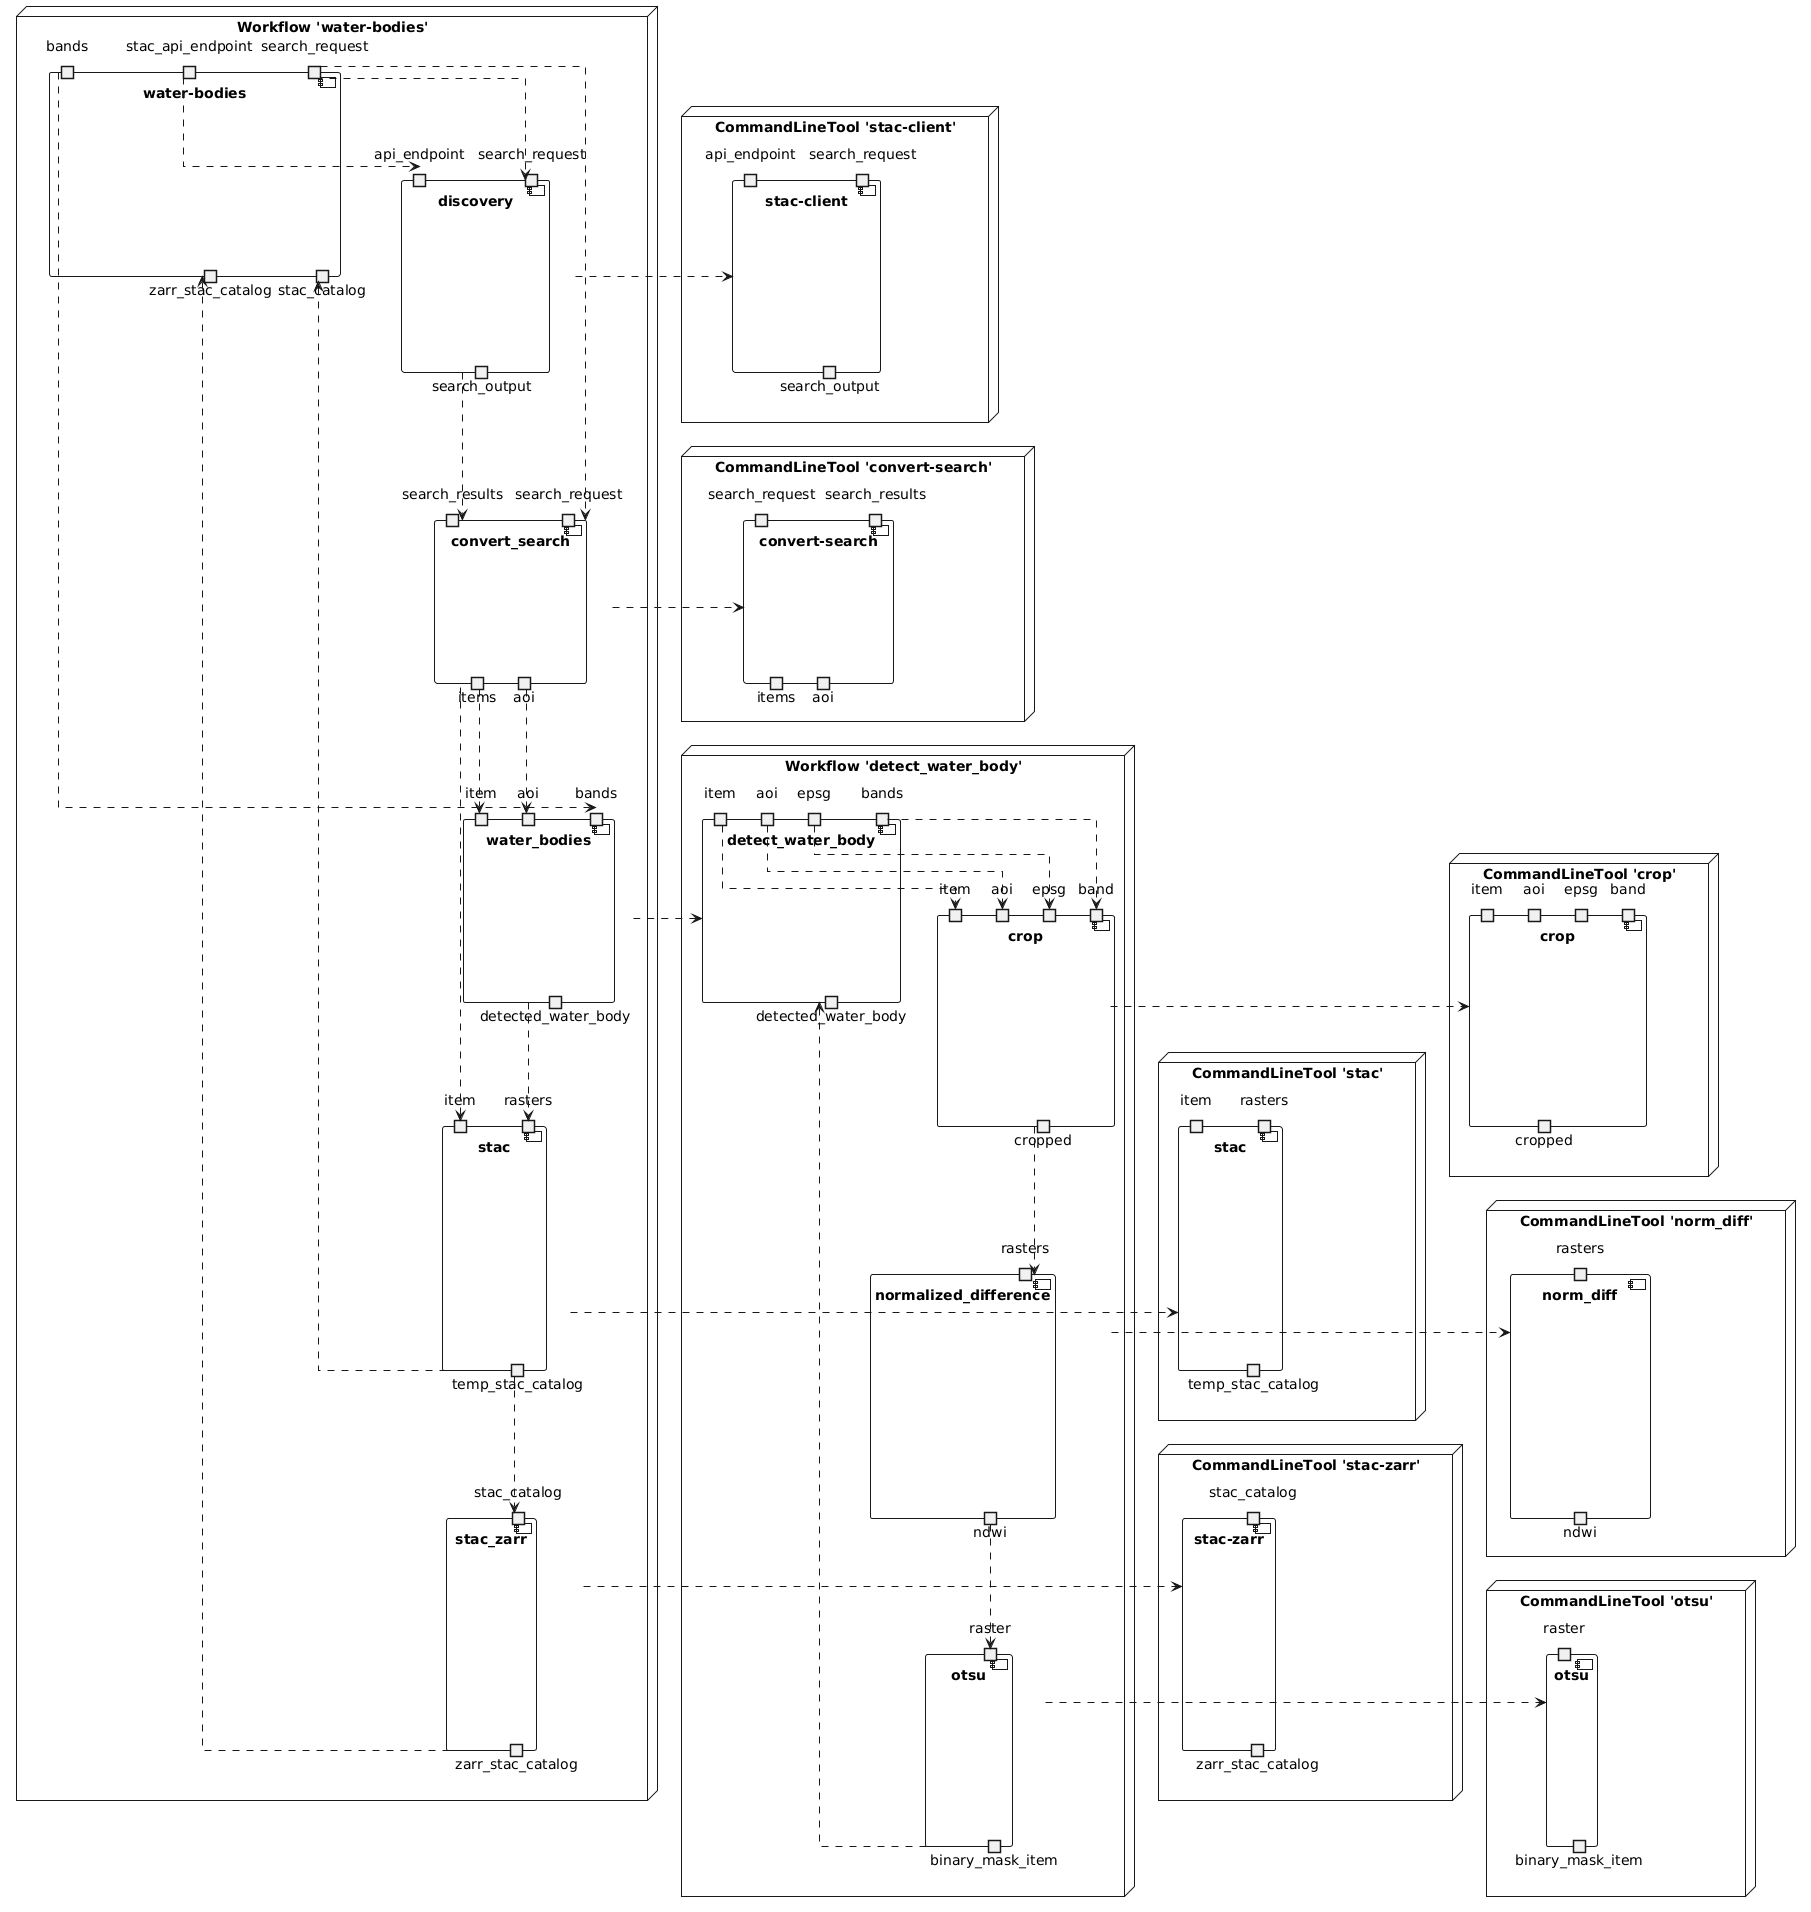

## 2.2 PlantUML `class` diagram

@startuml


class "water-bodies" as water_bodies extends Workflow {
    __ Inputs __
    
    + stac_api_endpoint: https://raw.githubusercontent.com/eoap/schemas/main/experimental/api-endpoint.yaml#APIEndpoint
    
    + search_request: https://raw.githubusercontent.com/eoap/schemas/main/experimental/discovery.yaml#STACSearchSettings
    
    + bands: string[] = ['green', 'nir']
    

    __ Outputs __
    
    + zarr_stac_catalog: Directory
    
    + stac_catalog: Directory
    

    
    __ Steps __
        
    - discovery: stac_client
        
    - convert_search: convert_search
        
    - water_bodies: detect_water_body
        
    - stac: stac
        
    - stac_zarr: stac_zarr
        
    
}

    
    package "Requirements" {
    
        
water_bodies --> ScatterFeatureRequirement
        
    
        
water_bodies --> SubworkflowFeatureRequirement
        
    
        
water_bodies --> SchemaDefRequirement
        
    
    }
    

    

class "stac-client" as stac_

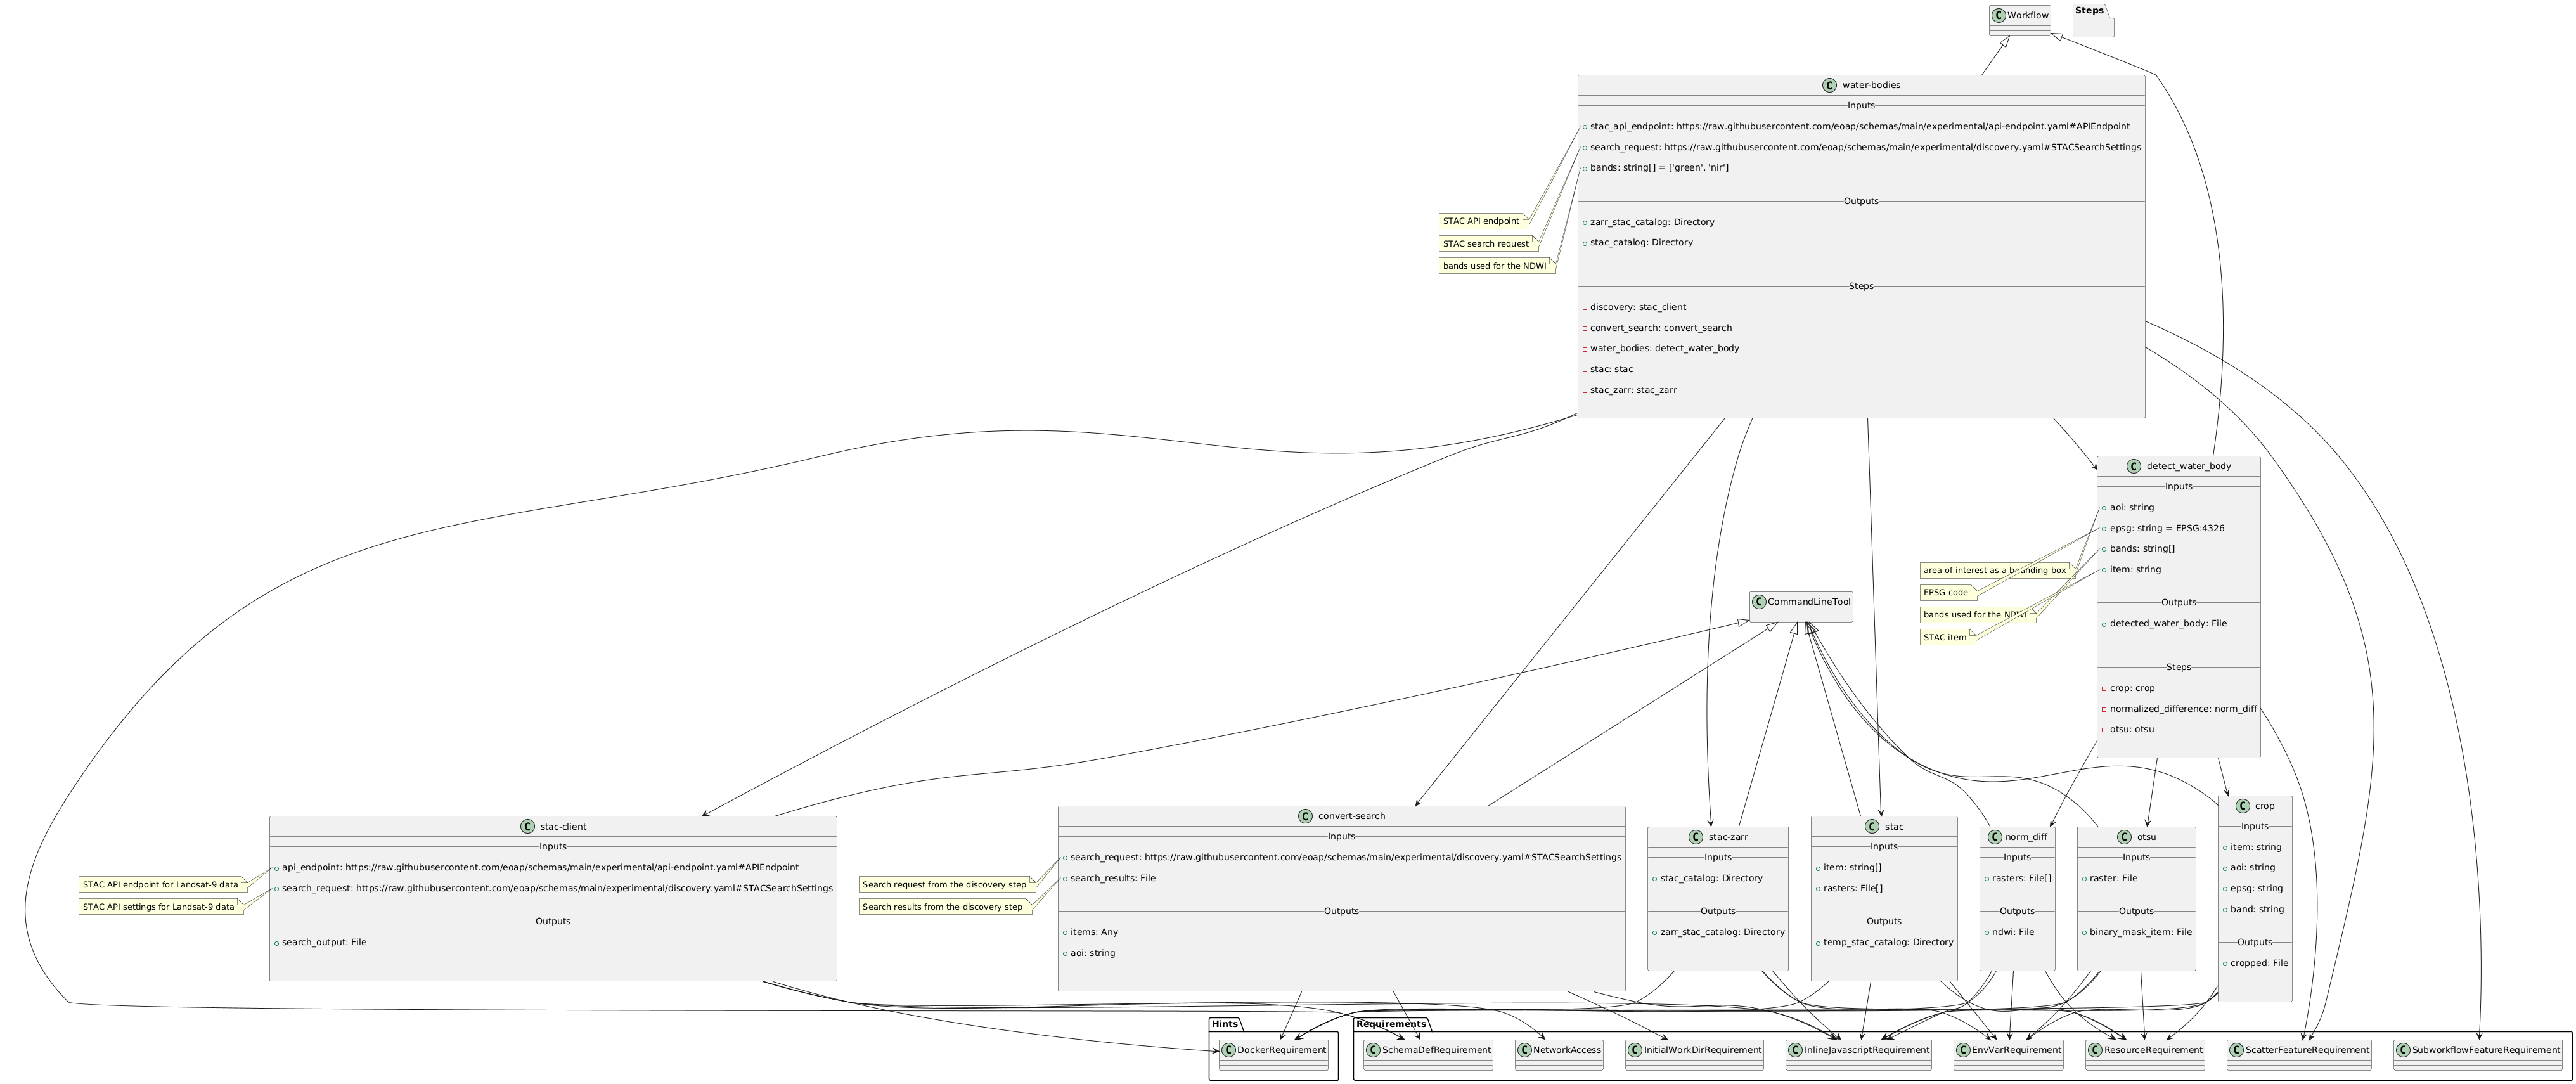

## 2.3 PlantUML `sequence` diagram

@startuml
autonumber "<b>[000]"



box "water-bodies"
    control "water-bodies" as water_bodies_or

    
        
    participant discovery
        
    participant convert_search
        
    participant water_bodies
        
    participant stac
        
    participant stac_zarr
        
    
end box

activate water_bodies_or


-> water_bodies_or : stac_api_endpoint
note top
STAC API endpoint
end note

-> water_bodies_or : search_request
note top
STAC search request
end note

-> water_bodies_or : bands
note top
bands used for the NDWI
end note



<-- water_bodies_or : zarr_stac_catalog


<-- water_bodies_or : stac_catalog










box "detect_water_body"
    control "detect_water_body" as detect_water_body_or

    
        
    participant crop
        
    participant normalized_difference
        
    participant otsu
        
    
end box

activate detect_water_body_or


-> detect_water_body_or : aoi


-> detect_water_body_or : epsg


-> detect_water_body_or : bands


-> detect

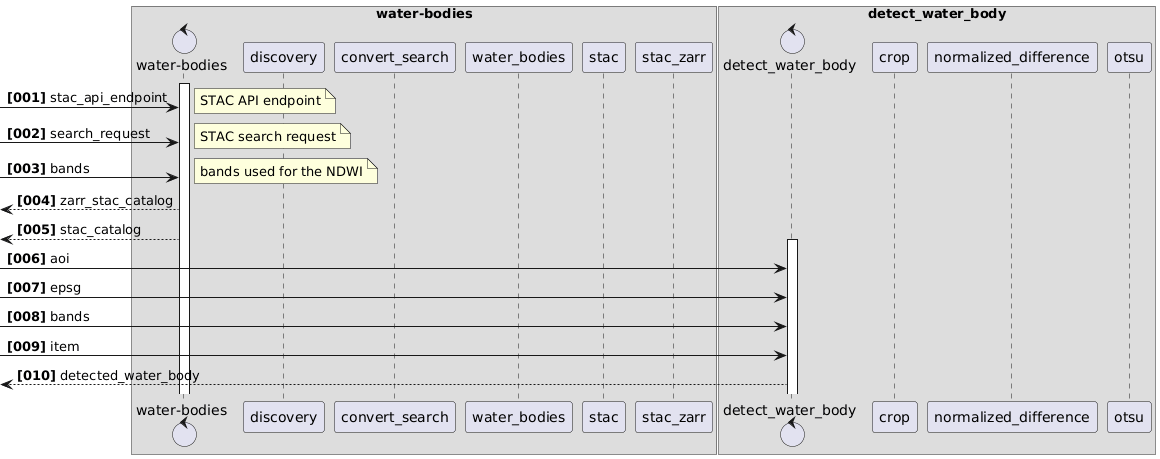

In [14]:
from cwl2puml import (
    to_puml,
    DiagramType
)
from io import (
    StringIO,
    BytesIO
)
from IPython.display import (
    display,
    Markdown,
    display_png
)
from plantuml import deflate_and_encode
from PIL import Image
from urllib.request import urlopen

for i, diagram_type in enumerate(DiagramType):
    index = i + 1
    display(Markdown(f"## 2.{index} PlantUML `{diagram_type.name.lower()}` diagram"))

    out = StringIO()
    to_puml(
        cwl_document=cwl_document,
        diagram_type=diagram_type,
        output_stream=out
    )

    clear_output = out.getvalue()

    print(clear_output)

    encoded = deflate_and_encode(clear_output)
    diagram_url = f"https://www.plantuml.com/plantuml/png/{encoded}"

    with urlopen(diagram_url) as url:
        img = Image.open(BytesIO(url.read()))
    display_png(img)